# Evaluating Performance on Test Set

**Warning**: This notebook will take a long time to run due to the complexity of the models and the size of the training set. Each model can take 20+ minutes to predict the test set, depending on computational resources.

## Load and Preprocess

To prevent longer runtime, only test set will be preprocessed.

In [ ]:
from transformers import AutoImageProcessor
from tensorflow.keras.datasets import cifar10
import joblib
import os

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess
processor = AutoImageProcessor.from_pretrained('google/vit-base-patch16-224')
X_test_preprocessed = processor(images=X_test, return_tensors='tf')['pixel_values']

/apps/tensorflow/2.18/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-20 17:52:13.418589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745185933.585332 2802827 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745185933.640424 2802827 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745185934.001022 2802827 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 

## Evaluate

Each model configuration or hyperparameter tweak was considered a "trial". The following will include performance evaluations of these trials on the full test set (10,000 samples) from CIFAR-10. Note that the original model was trained on half the samples in the training set (random sampling) and the others were trained on around 2/50 or 4/50 of the training set for exploration purposes. A personal function will be loaded from a .py file for evaluations and it requires *"..._vit_model"* folder and *"..._transfer_model.keras"* to be in the working directory.

### Baseline Model

This was the original model that was simply the transformer with a Dense classifier layer.

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at baseline_vit_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1353s 4s/step
Time to Predict: 1352.907952785492 secs

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1000
           1       0.97      0.97      0.97      1000
           2       0.98      0.95      0.97      1000
           3       0.90      0.94      0.92      1000
           4       0.94      0.98      0.96      1000
           5       0.95      0.94      0.94      1000
           6       0.98      0.97      0.97      1000
           7       0.99      0.97      0.98      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


Confusion Matrix


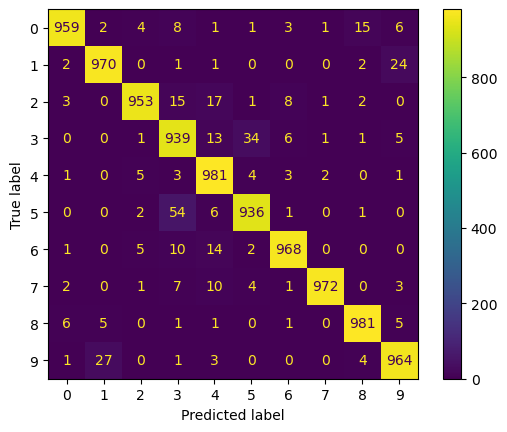

In [ ]:
from general_training import evaluate_trial

trial_name = 'baseline'
evaluate_trial(trial_name, X_test_preprocessed, y_test)

### Augmented Data Model

This was the baseline model but with randomly augmented images (horizontal flip, +/- 72 degree rotation, and +/- 0.1 zoom).

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at augment_vit_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1352s 4s/step
Time to Predict: 1352.0381152629852 secs

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.95      0.95      0.95      1000
           2       0.97      0.94      0.96      1000
           3       0.92      0.86      0.89      1000
           4       0.96      0.95      0.95      1000
           5       0.88      0.93      0.90      1000
           6       0.96      0.98      0.97      1000
           7       0.94      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000


Confusion Matrix


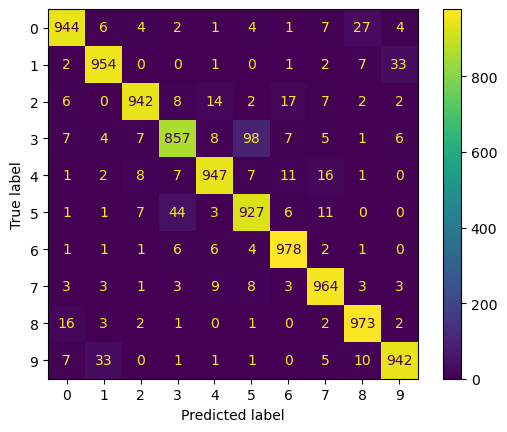

In [ ]:
from general_training import evaluate_trial

trial_name = 'augment'
evaluate_trial(trial_name, X_test_preprocessed, y_test)

### Regularized Model

This was the baseline model but with an extra Dense layer before the output. It used ReLU with 64 neurons, kernel regularizer of 0.001 and kernel initializer of "he_normal". It was proceeded by a dropout of 0.3 and then the classifier/output layer.

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at regularize_vit_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1341s 4s/step
Time to Predict: 1341.0378098487854 secs

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1000
           1       0.94      0.98      0.96      1000
           2       0.98      0.95      0.96      1000
           3       0.90      0.92      0.91      1000
           4       0.97      0.95      0.96      1000
           5       0.92      0.94      0.93      1000
           6       0.97      0.96      0.96      1000
           7       0.98      0.97      0.97      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000


Confusion Matrix


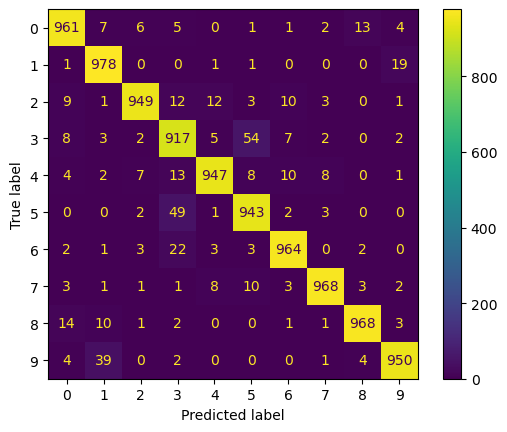

In [ ]:
from general_training import evaluate_trial

trial_name = 'regularize'
evaluate_trial(trial_name, X_test_preprocessed, y_test)

### Regularized with Augmented Data Model

This combined the previous augmented and regularized model into one.

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at regularize_and_augment_vit_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1342s 4s/step
Time to Predict: 1341.9095242023468 secs

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1000
           1       0.96      0.96      0.96      1000
           2       0.97      0.95      0.96      1000
           3       0.90      0.87      0.88      1000
           4       0.95      0.95      0.95      1000
           5       0.88      0.95      0.91      1000
           6       0.96      0.96      0.96      1000
           7       0.98      0.96      0.97      1000
           8       0.97      0.96      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000


Confusion Matrix


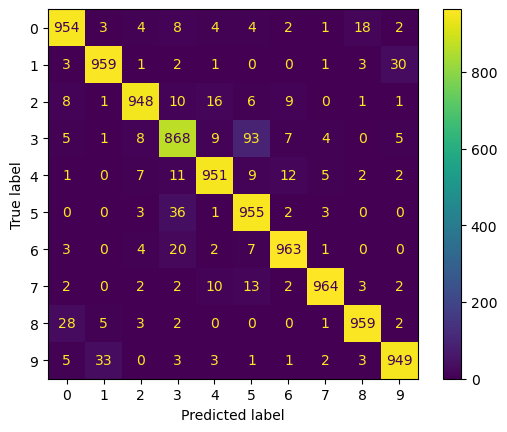

In [ ]:
from general_training import evaluate_trial

trial_name = 'regularize_and_augment'
evaluate_trial(trial_name, X_test_preprocessed, y_test)

### Baseline Model: Continued Training with Learning Rate Scheduler

This was the baseline model but with continued training using a learning rate schedular that exponentially decreased the learning rate by a factor of 0.5 after every epoch. It also started with a lower initial learning rate (1e-4 compared to 1e-3 for original training). This was done to see if the baseline model could be fine-tuned with a lower learning rate that would allow a better optimum to be reached. Note that random state 42 was used for the K-folds in all models, except this one where random state 0 was used so that the continued training would have a greater chance at seeing different samples

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at baseline_lr_vit_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1338s 4s/step
Time to Predict: 1338.5749015808105 secs

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1000
           1       0.96      0.97      0.97      1000
           2       0.98      0.95      0.97      1000
           3       0.90      0.94      0.92      1000
           4       0.94      0.98      0.96      1000
           5       0.96      0.94      0.94      1000
           6       0.98      0.97      0.97      1000
           7       0.99      0.97      0.98      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


Confusion Matrix


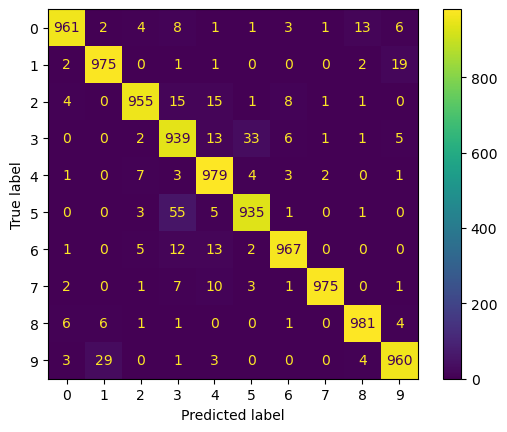

In [ ]:
from general_training import evaluate_trial

trial_name = 'baseline_lr'
evaluate_trial(trial_name, X_test_preprocessed, y_test)

## Show Correct and Incorrect Predictions

From the confusion matrices, we can see that all the models are making similar mistakes. We will visualize correct and incorrect predictions made from the baseline model since it was the best one and seems to be representative of the errors for the other models.

In [ ]:
from general_training import predict_trial
import numpy as np

# Make prediction on test set
trial_name = 'baseline'
y_pred = np.argmax(predict_trial(trial_name, X_test_preprocessed), axis=-1)

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at ../baseline_vit_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.



313/313 ━━━━━━━━━━━━━━━━━━━━ 1152s 4s/step


We can generate random samples, regardless of the class.

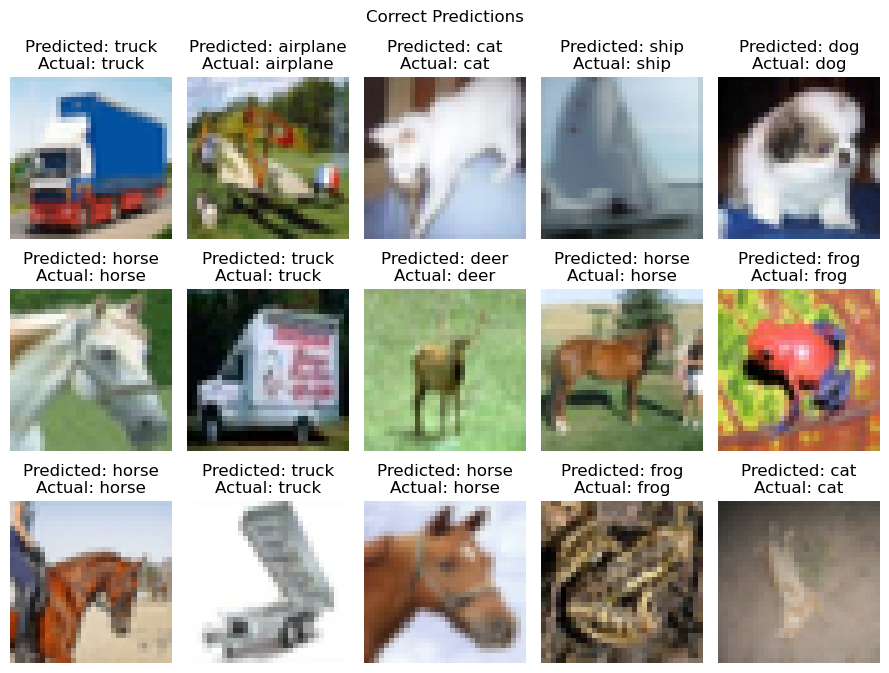

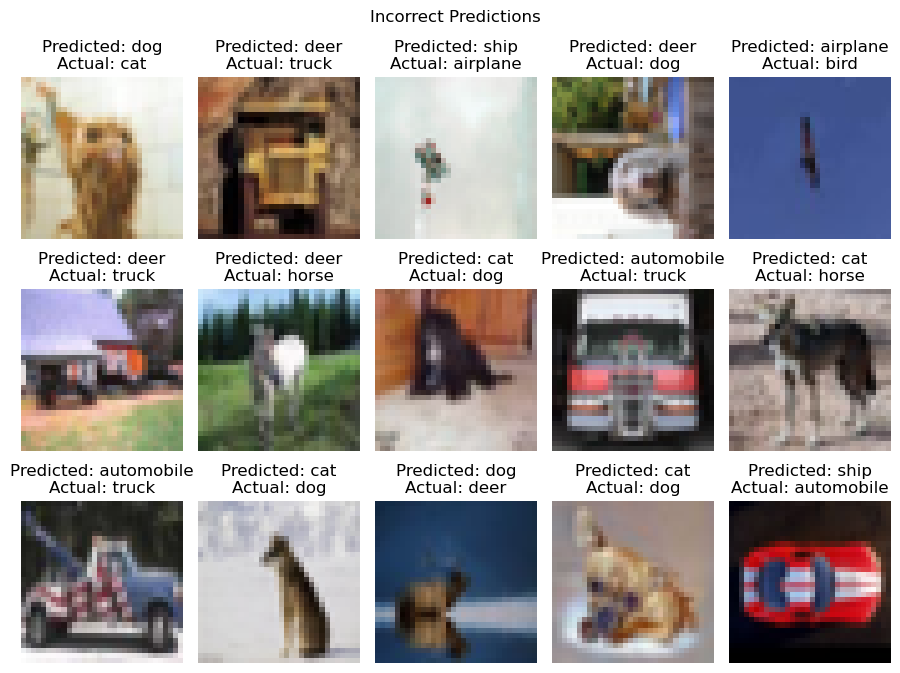

In [26]:
import matplotlib.pyplot as plt
import random

# Set seed
random.seed(42)

# Get correct and incorrect predictions
X_test_correct = X_test[(y_test.flatten() == y_pred.flatten())]
y_test_correct = y_test[(y_test.flatten() == y_pred.flatten())].flatten()
y_pred_correct = y_pred[(y_test.flatten() == y_pred.flatten())].flatten()
X_test_wrong = X_test[(y_test.flatten() != y_pred.flatten())]
y_test_wrong = y_test[(y_test.flatten() != y_pred.flatten())].flatten()
y_pred_wrong = y_pred[(y_test.flatten() != y_pred.flatten())].flatten()

# Grab samples
num_samples = 15
sample_indices = random.sample(range(len(X_test_correct)), num_samples)
X_test_correct = X_test_correct[sample_indices]
y_test_correct = y_test_correct[sample_indices]
y_pred_correct = y_pred_correct[sample_indices]
sample_indices = random.sample(range(len(X_test_wrong)), num_samples)
X_test_wrong = X_test_wrong[sample_indices]
y_test_wrong = y_test_wrong[sample_indices]
y_pred_wrong = y_pred_wrong[sample_indices]

# List class names in order
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

# Plot correct predictions
fig = plt.figure(figsize=(9, 7))

for i in range(len(y_test_correct)):

    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_test_correct[i])
    predicted_class = class_names[y_pred_correct[i]]
    true_class = class_names[y_test_correct[i]]
    ax.set_title(f'Predicted: {predicted_class}\nActual: {true_class}')
    ax.axis('off')

plt.suptitle('Correct Predictions')

plt.tight_layout()
plt.show()

# Plot wrong predictions
fig = plt.figure(figsize=(9, 7))

for i in range(len(y_test_wrong)):

    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_test_wrong[i])
    predicted_class = class_names[y_pred_wrong[i]]
    true_class = class_names[y_test_wrong[i]]
    ax.set_title(f'Predicted: {predicted_class}\nActual: {true_class}')
    ax.axis('off')

plt.suptitle('Incorrect Predictions')

plt.tight_layout()
plt.show()


Now we can show samples per class to have a better understanding of the confusion for each class.

-----------------------
airplane
-----------------------


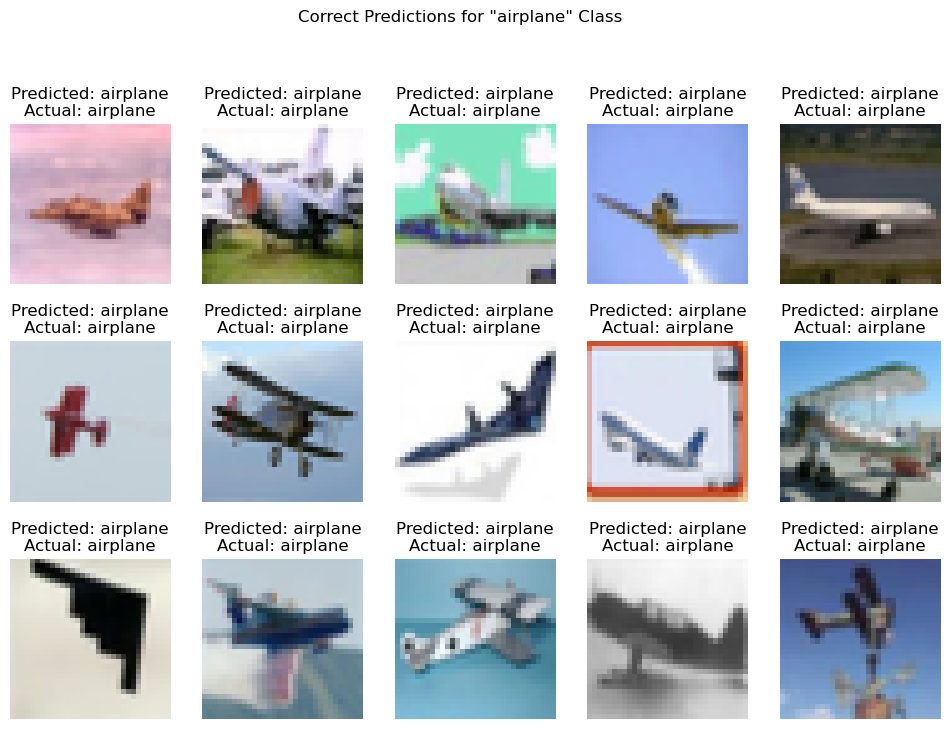

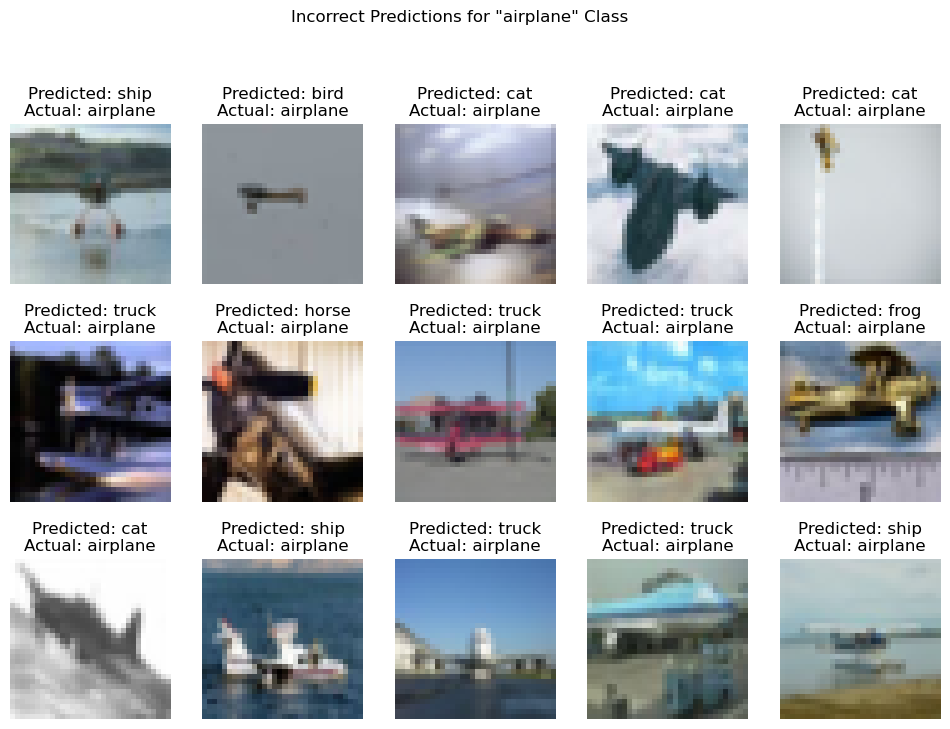

-----------------------
automobile
-----------------------


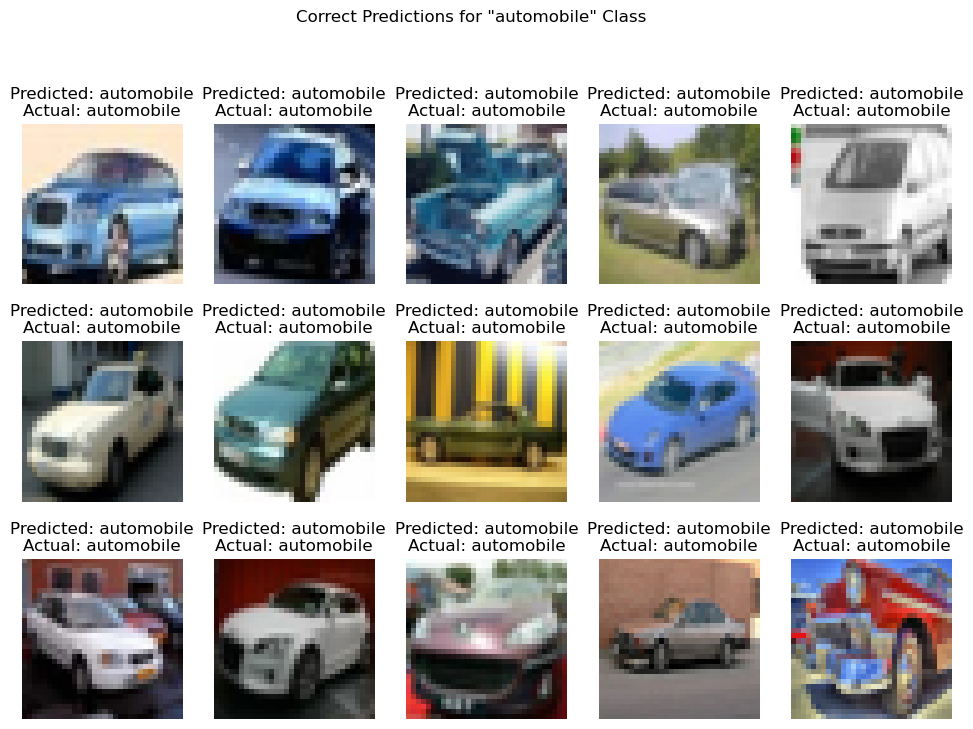

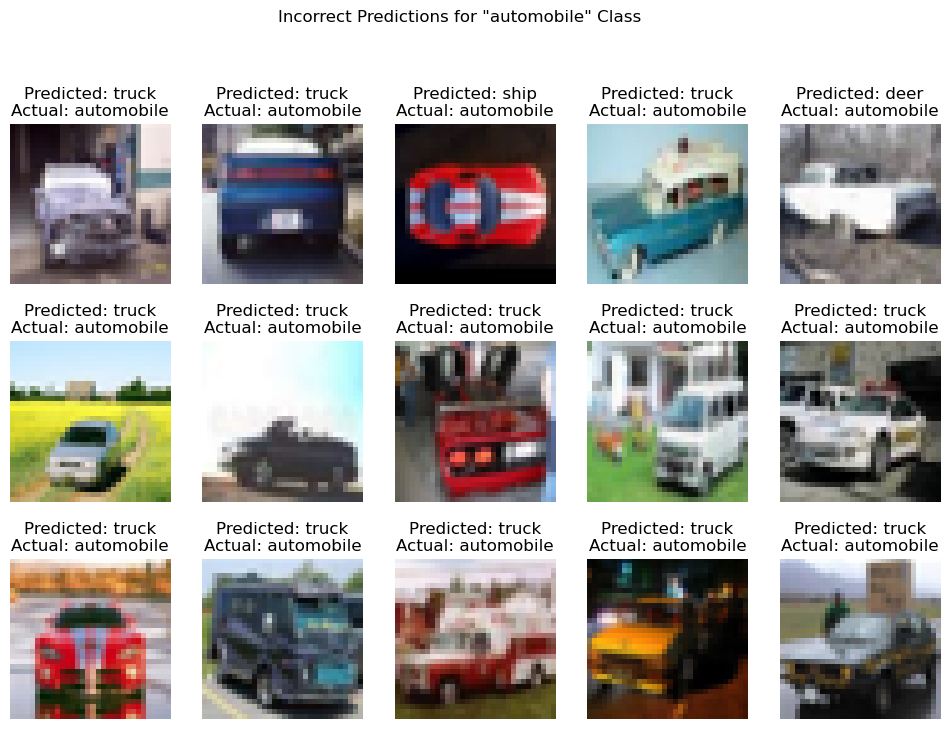

-----------------------
bird
-----------------------


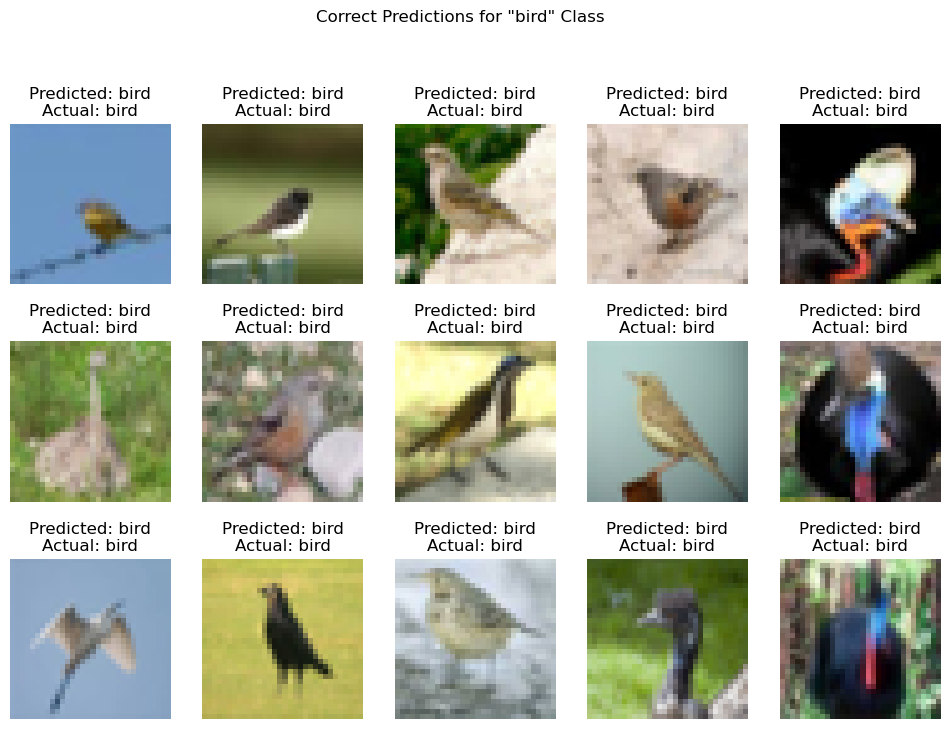

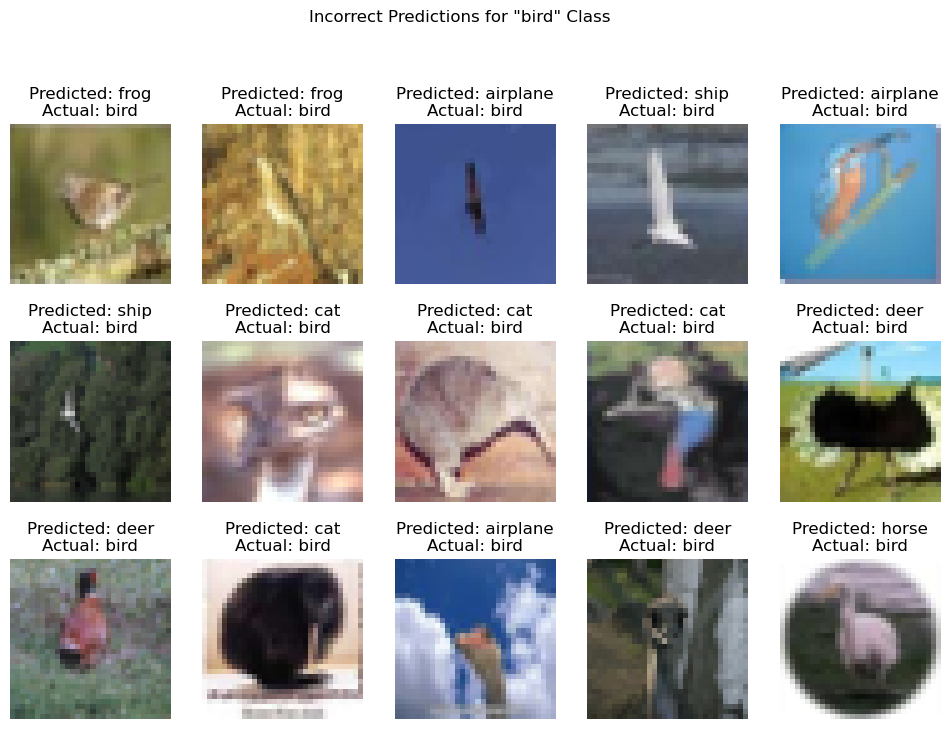

-----------------------
cat
-----------------------


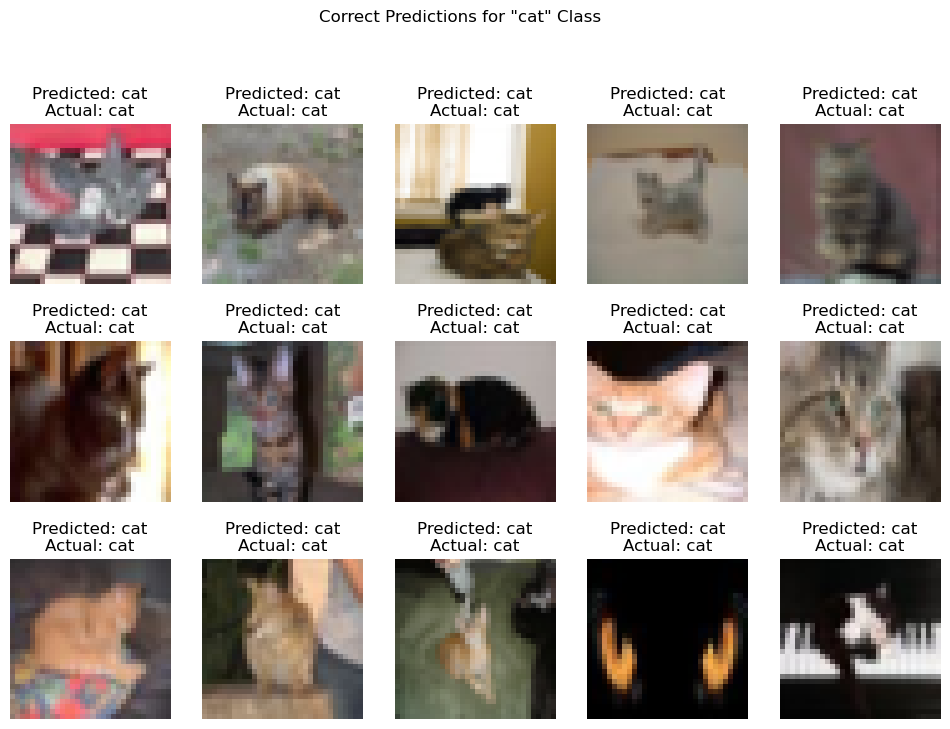

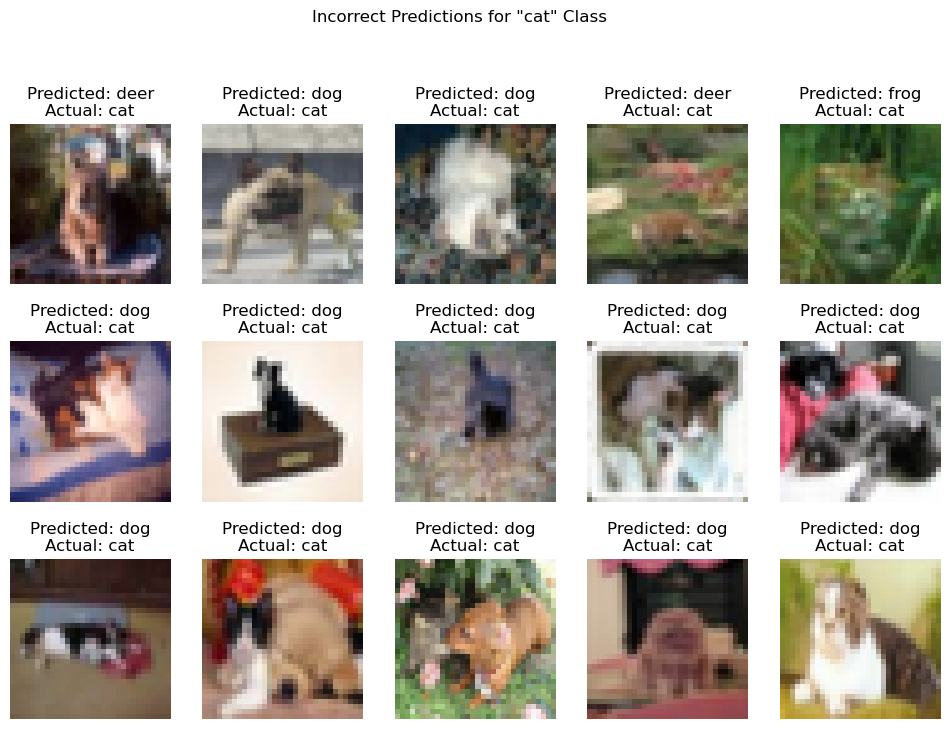

-----------------------
deer
-----------------------


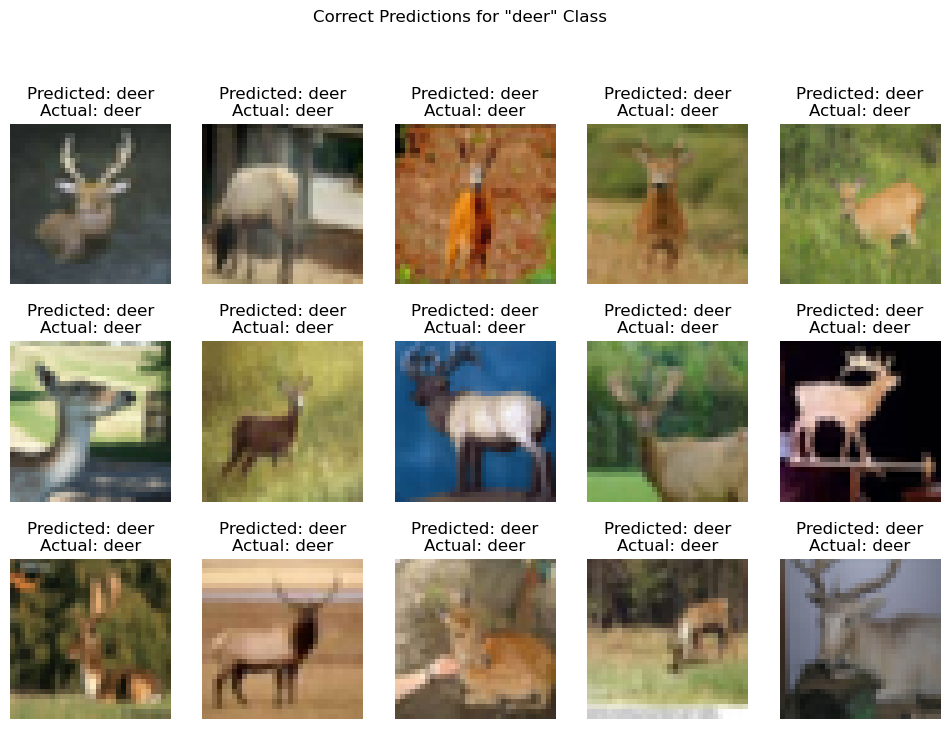

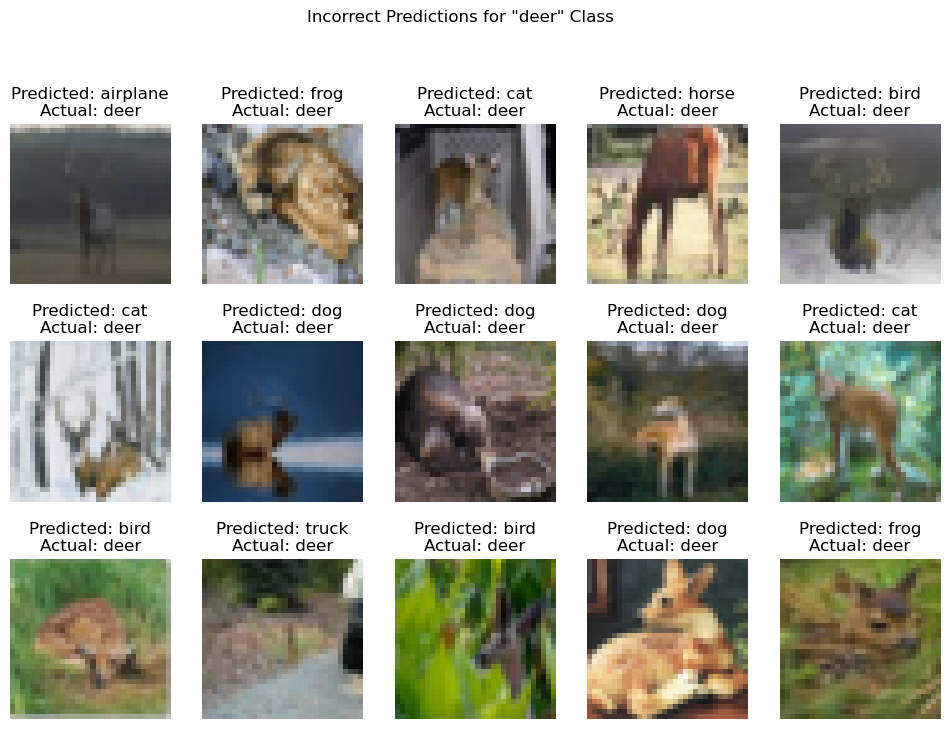

-----------------------
dog
-----------------------


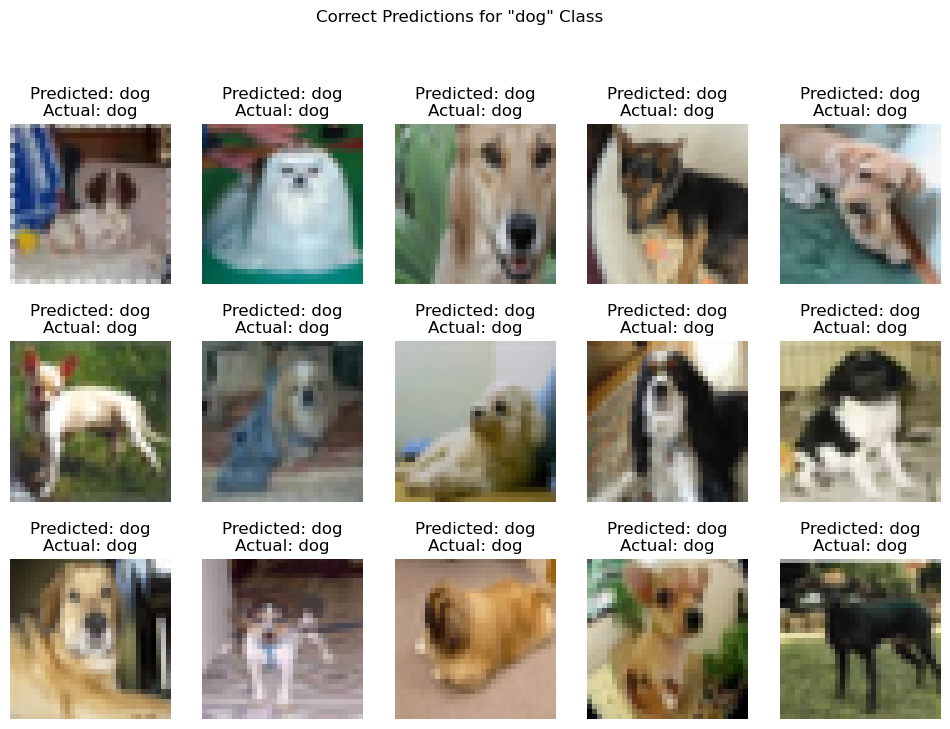

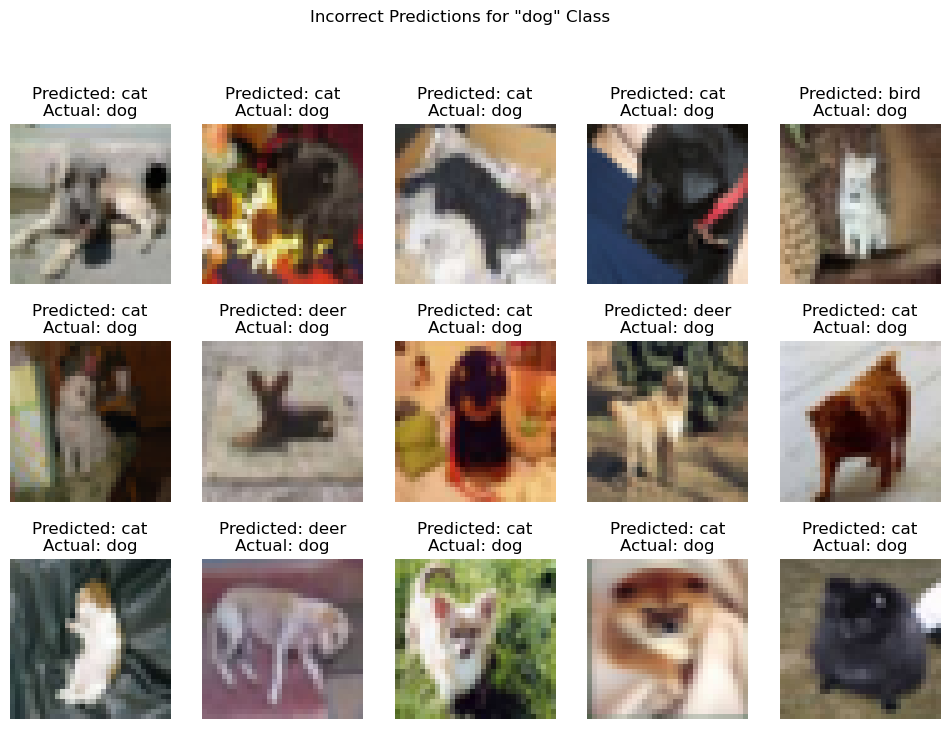

-----------------------
frog
-----------------------


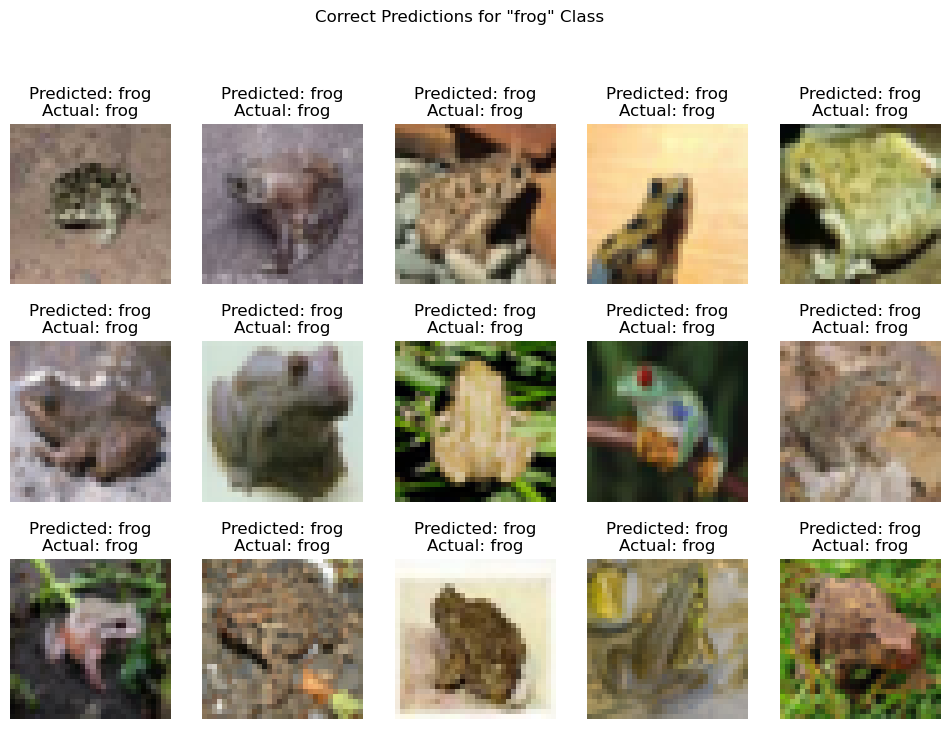

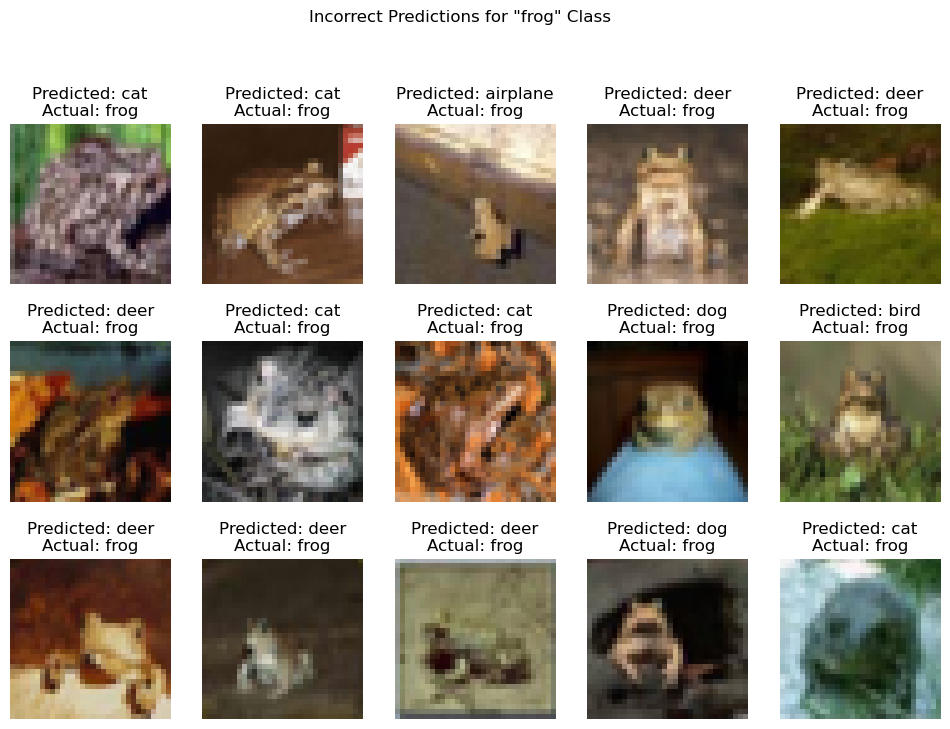

-----------------------
horse
-----------------------


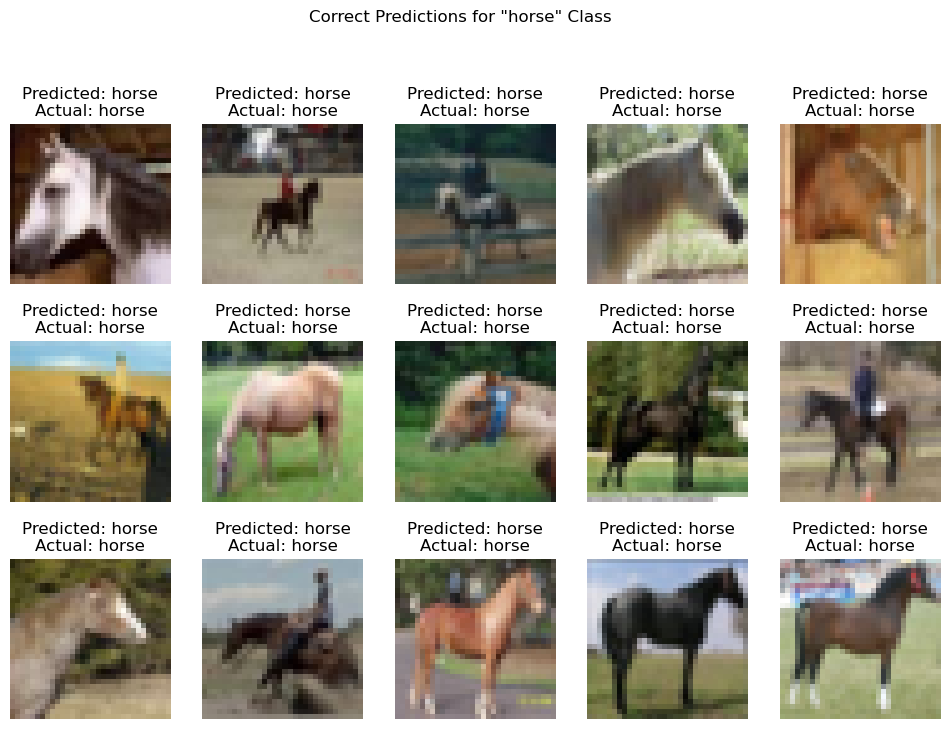

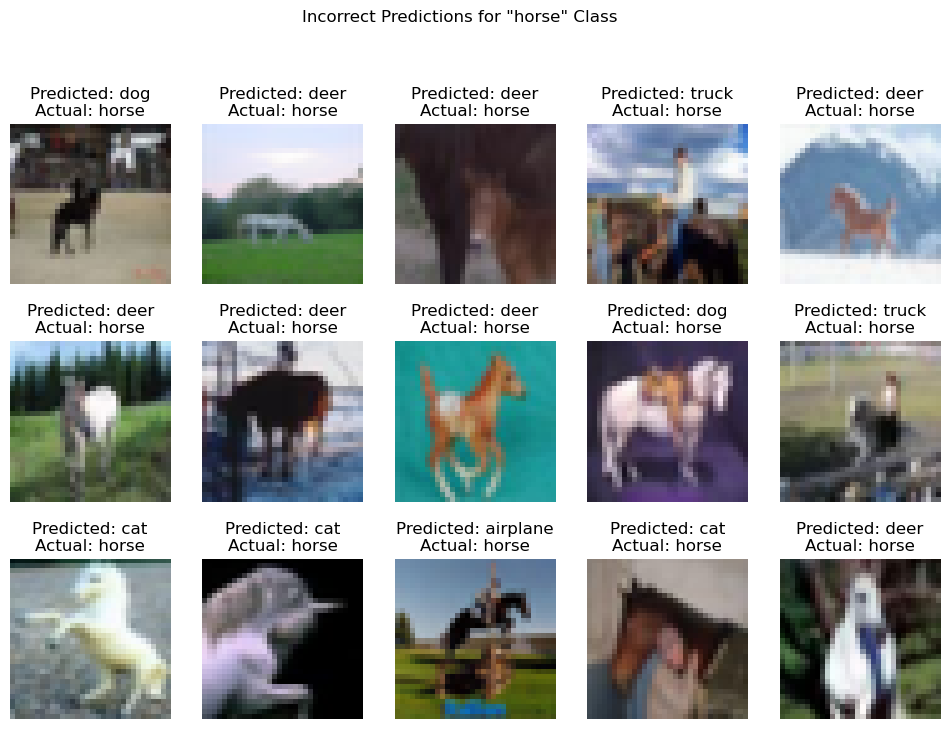

-----------------------
ship
-----------------------


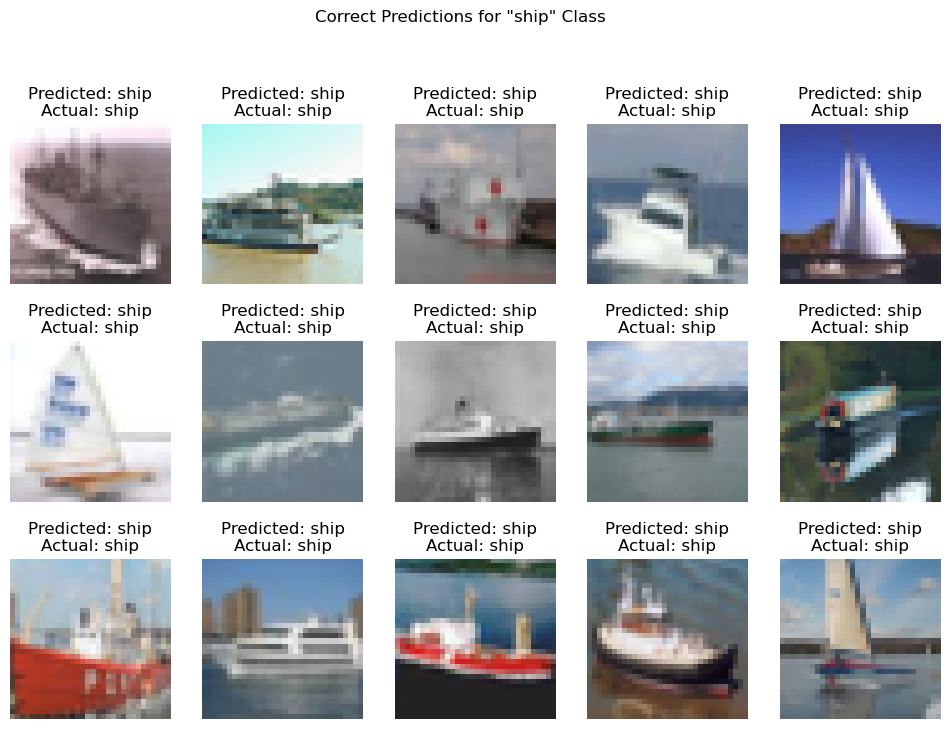

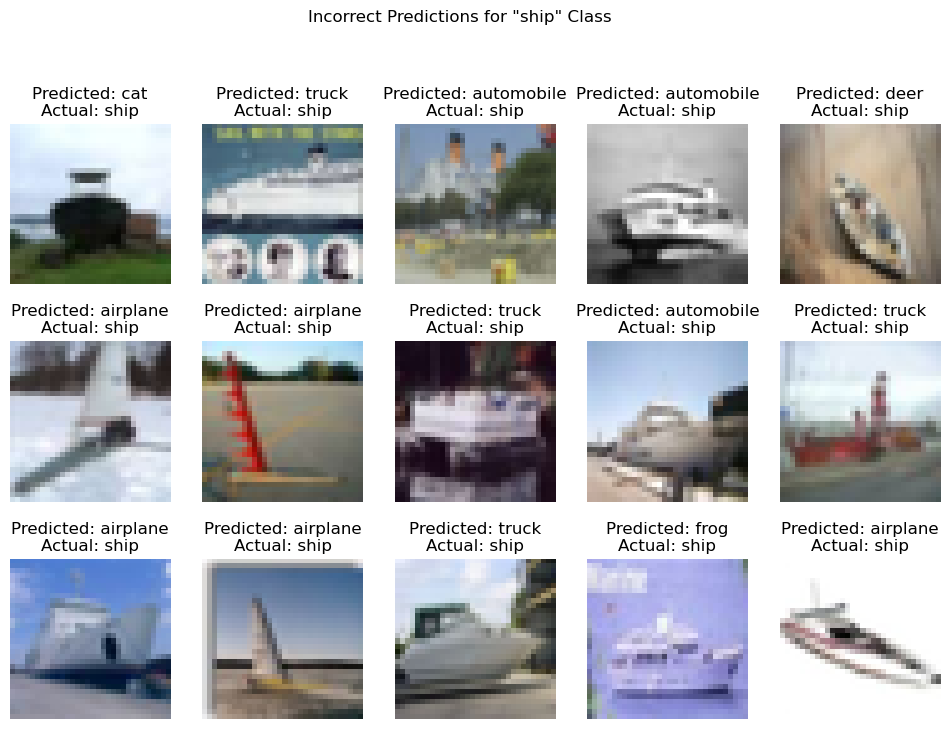

-----------------------
truck
-----------------------


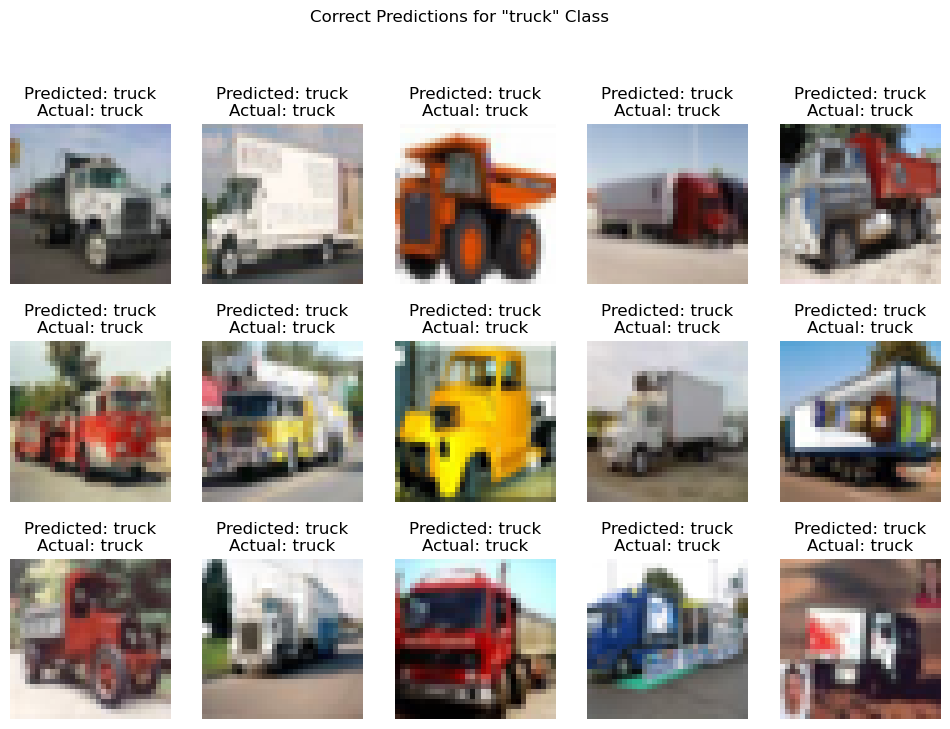

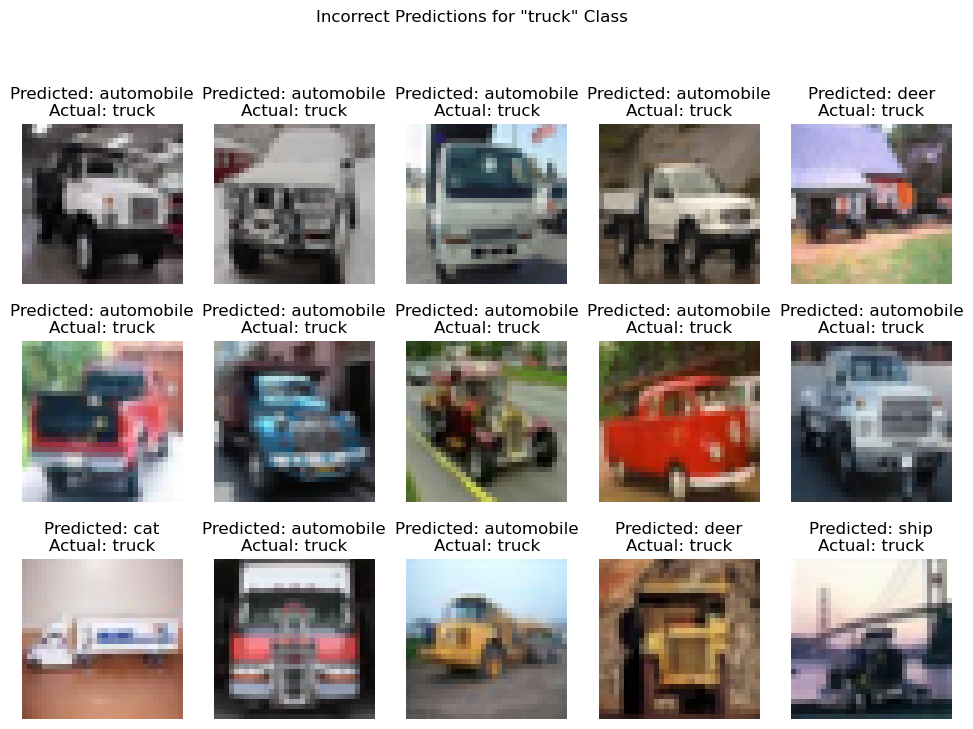

In [43]:
num_classes = 10

# List class names in order
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

for cl in range(num_classes):

    print('-----------------------')
    print(class_names[cl])
    print('-----------------------')

    # Get correct and incorrect predictions
    X_test_correct = X_test[(y_test.flatten() == y_pred.flatten()) & (y_test.flatten() == cl)]
    y_test_correct = y_test[(y_test.flatten() == y_pred.flatten()) & (y_test.flatten() == cl)].flatten()
    y_pred_correct = y_pred[(y_test.flatten() == y_pred.flatten()) & (y_test.flatten() == cl)].flatten()
    X_test_wrong = X_test[(y_test.flatten() != y_pred.flatten()) & (y_test.flatten() == cl)]
    y_test_wrong = y_test[(y_test.flatten() != y_pred.flatten()) & (y_test.flatten() == cl)].flatten()
    y_pred_wrong = y_pred[(y_test.flatten() != y_pred.flatten()) & (y_test.flatten() == cl)].flatten()

    # Grab samples
    num_samples = 15
    sample_indices = random.sample(range(len(X_test_correct)), num_samples)
    X_test_correct = X_test_correct[sample_indices]
    y_test_correct = y_test_correct[sample_indices]
    y_pred_correct = y_pred_correct[sample_indices]
    sample_indices = random.sample(range(len(X_test_wrong)), num_samples)
    X_test_wrong = X_test_wrong[sample_indices]
    y_test_wrong = y_test_wrong[sample_indices]
    y_pred_wrong = y_pred_wrong[sample_indices]

    # Plot correct predictions
    fig = plt.figure(figsize=(12, 8))

    for i in range(len(y_test_correct)):

        ax = fig.add_subplot(3, 5, i+1)
        ax.imshow(X_test_correct[i])
        predicted_class = class_names[y_pred_correct[i]]
        true_class = class_names[y_test_correct[i]]
        ax.set_title(f'Predicted: {predicted_class}\nActual: {true_class}')
        ax.axis('off')

    class_name = class_names[cl]
    plt.suptitle(f'Correct Predictions for "{class_name}" Class', y=1.01)
    plt.show()

    # Plot wrong predictions
    fig = plt.figure(figsize=(12, 8))

    for i in range(len(y_test_wrong)):

        ax = fig.add_subplot(3, 5, i+1)
        ax.imshow(X_test_wrong[i])
        predicted_class = class_names[y_pred_wrong[i]]
        true_class = class_names[y_test_wrong[i]]
        ax.set_title(f'Predicted: {predicted_class}\nActual: {true_class}')
        ax.axis('off')

    class_name = class_names[cl]
    plt.suptitle(f'Incorrect Predictions for "{class_name}" Class', y=1.01)
    plt.show()